# <span style="background-color: powderblue">CREDIT CARD FRAUD DETECTION </span>

####  <span style="background-color: beige">By:Afnan Alsirhani & Wafa Alharbi</span>

## **Objective:**
This project aim is to build machine learning models to classify fraudulent card transactions from a given card transactions data. This system is useful for both people who use credit cards and banks to keep their customers safe.

## **Data:**
The dataset [CreditCardFraud] (https://www.kaggle.com/mlg-ulb/creditcardfraud) contains transactions made by credit cards in September 2013 by European cardholders.where we have 284,807 transactions with 29 features

## **Features:**
* Time: Number of seconds elapsed between this transaction and the first transaction in the dataset
* V1, V2, ... V28: result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
* Amount: the amount of the transaction.
* Class: is the target variable with value 1 in case of fraud and 0 otherwise.


In [1]:
import imblearn
import numpy as np
import pickle
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, precision_score, recall_score, precision_recall_curve,f1_score,ConfusionMatrixDisplay, fbeta_score
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier





In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [45]:
SQL_df=df

In [7]:
engine=create_engine('sqlite://',echo=False)
SQL_df.to_sql("credic_card",con=engine)

In [8]:
SQL_df=pd.read_sql('SELECT * FROM credic_card ORDER BY Time;',engine)
SQL_df

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


># <span style="background-color: beige">EDA</span>

In [6]:
#Checking if there is null
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#Checking if there is duplicate
print(df.duplicated().sum())

1081


In [8]:
#Show the duplicate
df[df.duplicated(keep=False)].head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
220,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
221,145.0,-2.420413,1.947885,0.553646,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,...,1.213826,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0


In [9]:
# drop duplicates values
df.drop_duplicates(inplace=True)

In [10]:
# shape after droping duplicates
df.shape

(283726, 31)

In [11]:
with open('CleanData.pickle', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)

># <span style="background-color: beige">Features  Engineering:</span>

In [12]:
with open('CleanData.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [13]:
y = df['Class']
X = df.drop('Class',axis=1)
X_train, X_rm, y_train, y_rm = train_test_split(X, y, train_size=0.90,random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_rm, y_rm, test_size=0.5,random_state=41)
train = pd.concat([X_train, y_train],axis=1)

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,254920.0,94847.184089,47465.731879,0.0,54269.75,84727.5,139304.25,172792.0
1,433.0,80542.697460,48488.801405,406.0,41204.00,75033.0,128595.00,170348.0


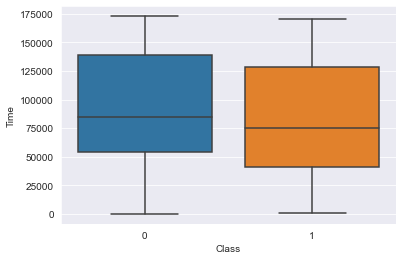

In [14]:
sns.boxplot(x="Class", y="Time",data=train)
train.groupby("Class").Time.describe()

Time itself doesn't seem to determine class well. We will feature a new variable which is the time difference between transaction and the precede transaction. In order to that, we will combine train and test first, do the feature engineering, then split the dataset again.

In [15]:
#the column names are auto reordered, lets turn it back to what it should be
df = df[list(train.columns.values)]
df.sort_index(inplace=True)
#create the time difference feature
df['Time_Difference'] = df['Time']-df['Time'].shift()
#remove the nan row caused by lag
df.dropna(axis=0,inplace=True)

#split the data set again
y = df['Class']
X = df.drop('Class',axis=1)
X_train, X_rm, y_train, y_rm = train_test_split(X, y, train_size=0.90,random_state=41)
X_val, X_test, y_val, y_test = train_test_split(X_rm, y_rm, test_size=0.5,random_state=41)
train = pd.concat([X_train, y_train],axis=1)

In [16]:
X_val.shape

(14186, 31)

In [17]:
X_test.shape

(14187, 31)

In [18]:
X_test.shape

(14187, 31)

In [19]:
X_train.shape

(255352, 31)

In [20]:
train.groupby('Class').Time_Difference.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,254928.0,0.607548,1.053942,0.0,0.0,0.0,1.0,32.0
1,424.0,1.172170,1.970486,0.0,0.0,1.0,1.0,16.0


<AxesSubplot:xlabel='Class', ylabel='Time_Difference'>

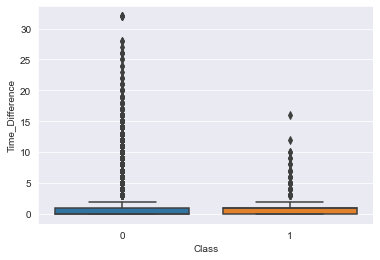

In [21]:
sns.boxplot(x="Class", y="Time_Difference",data=train)

Most of the time difference are similiar, however, some large difference might indicates fraud, as fraud often happens at time that has few transactions.

C:\Users\afnan\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


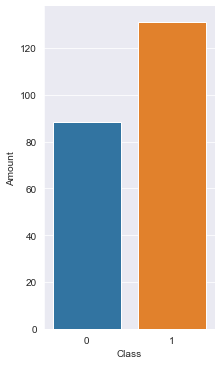

In [22]:
sns.factorplot(x="Class", y="Amount", data=train, kind="bar", ci=None, aspect=.6)

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,254928.0,88.567722,250.163474,0.0,5.69,22.000,77.5,25691.16
1,424.0,131.300495,269.169423,0.0,1.00,11.395,111.7,2125.87


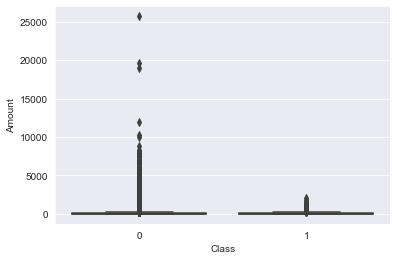

In [23]:
sns.boxplot(x="Class", y="Amount", data=train)
train.groupby('Class').Amount.describe()

Even though average amount of non-fraud is greater than fraud, transaction of large amount however are mostly fraud, which follows our instinct about fraud. We will create a binary factor indicating transaction with large amount, with a threshold of 2000.

In [24]:
pd.options.mode.chained_assignment = None
def amount_threshold(x):
    if x > 2000: return 1
    else: return 0
    
X_train['Large_Amount'] = X_train['Amount'].apply(amount_threshold)
X_val['Large_Amount'] = X_val['Amount'].apply(amount_threshold)
X_test['Large_Amount'] = X_test['Amount'].apply(amount_threshold)

># <span style="background-color: beige">Classification</span>

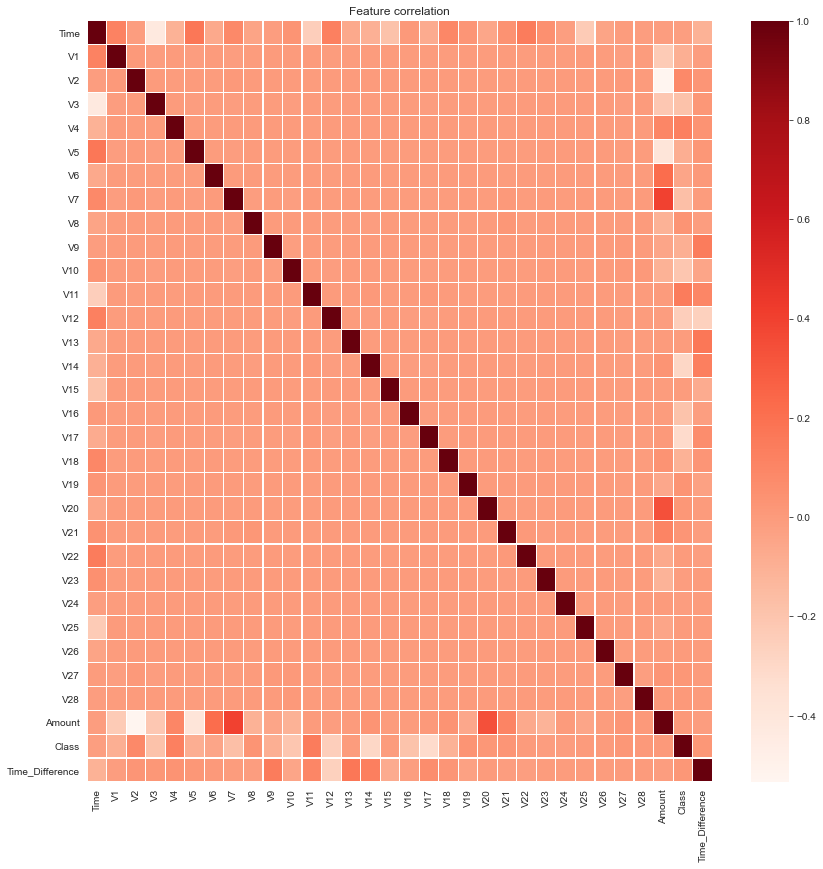

In [25]:
plt.figure(figsize = (14,14))
plt.title('Feature correlation')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [26]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  283252
Fraudulent transactions count:  473


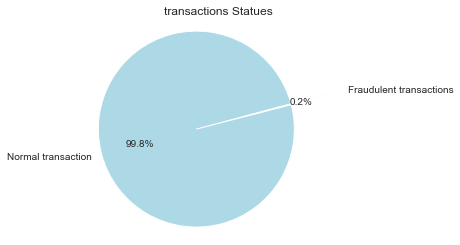

In [27]:
Tasks = [283252,473]
my_labels = 'Normal transaction','Fraudulent transactions'
my_colors = ['lightblue','lightsteelblue']
my_explode = ( 0.5, 0)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = False, colors=my_colors, explode=my_explode)
plt.title('transactions Statues')
plt.axis('equal')
plt.show()

># <span style="background-color: beige"> Building The Model :</span>

In [28]:
def print_metrics(y_te,y_pred):
    print(f'Accuracy:    {accuracy_score(y_te, y_pred)}\n') 
    print(f'F1 Score:    {f1_score(y_te, y_pred)}\n')
    print(f'Recall:      {precision_score(y_te, y_pred)}\n') 
    print(f'Precision:   {recall_score(y_te, y_pred)}\n' )

Scaling th Data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
X_train_sc, X_rm_sc, y_train_sc, y_rm_sc = train_test_split(X, y, train_size=0.90,random_state=41)
X_val_sc, X_test_sc, y_val_sc, y_test_sc = train_test_split(X_rm_sc, y_rm_sc, test_size=0.5,random_state=41)

In [30]:
X_train.shape

(255352, 32)

#### Logistic Regression (Baseline)

In [31]:
from sklearn.linear_model import LogisticRegressionCV
logCV = LogisticRegressionCV(Cs=[0.01,0.1,1,10,100], scoring='average_precision',verbose=0,
                             max_iter=3000,random_state=5001)
logCV.fit(X_train_sc,y_train_sc)
print("The best parameter C is",logCV.C_[0])

The best parameter C is 100.0


In [32]:
logr= LogisticRegression(C=100,max_iter=3000)
logr.fit(X_train_sc,y_train_sc)
pred_logr = logr.predict(X_val_sc)

In [33]:
y_val.shape

(14186,)

In [34]:
print ("Logistic Regression")
print_metrics(y_val_sc,pred_logr)

Logistic Regression
Accuracy:    0.9992950796559988

F1 Score:    0.75

Recall:      0.9375

Precision:   0.625



#### XGBClassifier

In [35]:
from xgboost import XGBClassifier

In [36]:
# fit model on training data
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train,y_train)
pred_xgb = xgb.predict(X_val)

[15:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
print ("XGB Classifier: ")
print_metrics(y_val,pred_xgb)

XGB Classifier: 
Accuracy:    0.9995770477935993

F1 Score:    0.8636363636363635

Recall:      0.95

Precision:   0.7916666666666666



#### RandomForest

In [38]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_val)

In [39]:
print ("Random Forest Classifier: ")
print_metrics(y_val,pred_rf)

Random Forest Classifier: 
Accuracy:    0.9996475398279995

F1 Score:    0.8837209302325582

Recall:      1.0

Precision:   0.7916666666666666



#### Decision Tree Matrix

In [40]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train,y_train)
pred_dtm = dt.predict(X_val)

In [41]:
print ("Decision Tree Matrix Classifier: ")
print_metrics(y_val,pred_dtm)

Decision Tree Matrix Classifier: 
Accuracy:    0.999365571690399

F1 Score:    0.7906976744186046

Recall:      0.8947368421052632

Precision:   0.7083333333333334



### SVM

SUPPORT VECTOR MACHINE LINEAR KERNEL

In [42]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
pred_svc =svc.predict(X_val)

In [43]:
print ("SUPPORT VECTOR Classifier: ")
print_metrics(y_val,pred_svc)

SUPPORT VECTOR Classifier: 
Accuracy:    0.9985196672775977

F1 Score:    0.36363636363636365

Recall:      0.6666666666666666

Precision:   0.25



C:\Users\afnan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\afnan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\afnan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods:

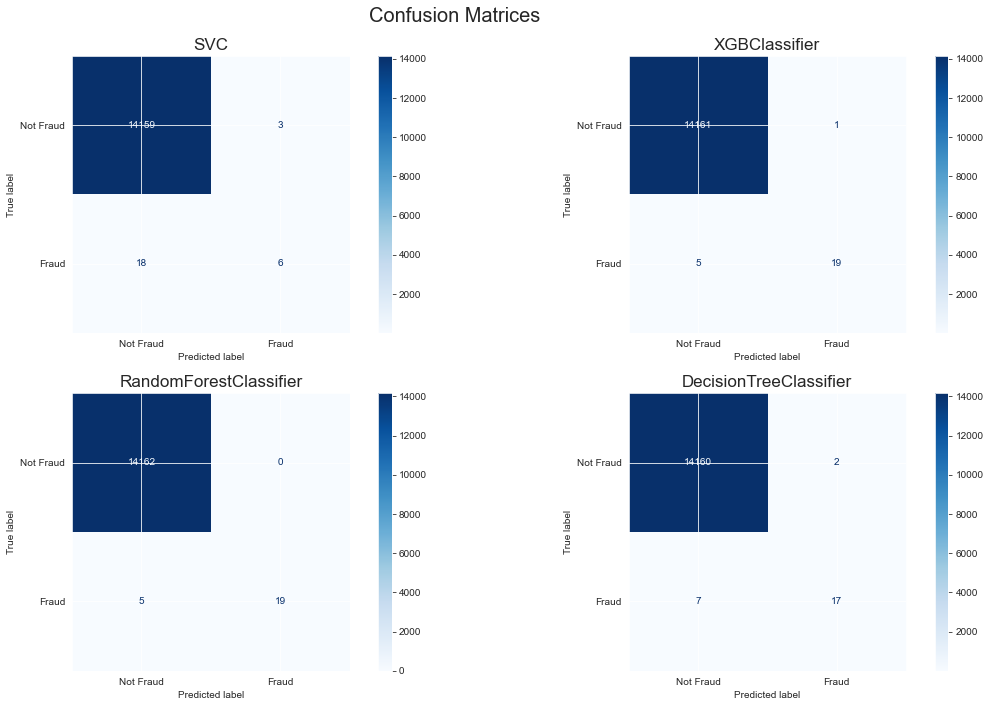

In [44]:
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

for cls, ax in zip([svc,xgb,rf,dt], axes.flatten()):
    plot_confusion_matrix(
        cls, 
        X_val, 
        y_val, 
        ax=ax,
        cmap=plt.cm.Blues,
        display_labels=['Not Fraud','Fraud'])
    ax.title.set_text(type(cls).__name__)
    ax.title.set_size(17)
plt.rc('font', size=12)
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.suptitle('Confusion Matrices ', fontsize=20)
plt.tight_layout()
plt.show;

###  <span style="background-color: beige">Dealing with Class Imbalance by SMOTE and ADAYSN </span>

1- SMOTE:

In [20]:
from imblearn.combine import SMOTETomek

In [32]:
SMOTE?

In [45]:
# dealing with imbalance by smote
sm = SMOTE(random_state=4001)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
pd.value_counts(y_train_smote)

1    254928
0    254928
Name: Class, dtype: int64

2- ADASYN:

In [50]:
from imblearn.over_sampling import ADASYN
# apply the ADASYN over-sampling
ada = ADASYN(random_state=42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 254928, 1: 424})
Resampled dataset shape Counter({0: 254928, 1: 254888})


Check the models after resampling the data

In [46]:
# check model aftrer resampling train data with smote
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train_smote,y_train_smote)
pred_xgb = xgb.predict(X_val)
print ("XGB Classifier after smote rsampling: ")
print_metrics(y_val,pred_xgb)

[15:55:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier after smote rsampling: 
Accuracy:    0.9995770477935993

F1 Score:    0.8695652173913043

Recall:      0.9090909090909091

Precision:   0.8333333333333334



In [52]:
# check model aftrer adaysn resampling
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_res,y_res)
pred_xgb = xgb.predict(X_val)
print ("XGB Classifier after adaysn resampling: ")
print_metrics(y_val,pred_xgb)

[00:31:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier after adaysn resampling: 
Accuracy:    0.9995770477935993

F1 Score:    0.8695652173913043

Recall:      0.9090909090909091

Precision:   0.8333333333333334



In [47]:
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_val)
print ("Random Forest Classifier after smote rsampling: ")
print_metrics(y_val,y_pred)

Random Forest Classifier after smote rsampling: 
Accuracy:    0.9996475398279995

F1 Score:    0.8837209302325582

Recall:      1.0

Precision:   0.7916666666666666



In [54]:
rf = RandomForestClassifier()
rf.fit(X_res, y_res)
y_pred = rf.predict(X_val)
print ("Random Forest Classifier after adaysn rsampling: ")
print_metrics(y_val,y_pred)

Random Forest Classifier after adaysn rsampling: 
Accuracy:    0.9995770477935993

F1 Score:    0.8636363636363635

Recall:      0.95

Precision:   0.7916666666666666



In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote, y_train_smote)
y_pred = dt.predict(X_val)
print ("Decision Tree Classifier after SMOTE rsampling: ")
print_metrics(y_val,y_pred)

Decision Tree Classifier after SMOTE rsampling: 
Accuracy:    0.9983786832087974

F1 Score:    0.5964912280701754

Recall:      0.5151515151515151

Precision:   0.7083333333333334



In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_res,y_res)
y_pred = dt.predict(X_val)
print ("Decision Tree Classifier after adaysn rsampling: ")
print_metrics(y_val,y_pred)

Decision Tree Classifier after adaysn rsampling: 
Accuracy:    0.9984491752431975

F1 Score:    0.6333333333333333

Recall:      0.5277777777777778

Precision:   0.7916666666666666



**Since that SMOTE give us higher F1 Score than ADAYSON we will perform Voting Claddifier and Cross Validation between the hightest Three models: (Random forest and descision tree and  XGB classifier)**

# <span style="background-color: beige"> Voting Classifier </span>

In [49]:
 from sklearn.ensemble import VotingClassifier

In [50]:
models = ['rf', 'dt' ,'xgb']# Best three models
model_var = [eval(n) for n in models]
model_list = list(zip(models, model_var))


In [51]:
weights = [2,1,2.5]# Assigning weights
voting_model = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,  #include weights
                                    n_jobs=-1)
voting_model.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            

In [52]:
y_pred_v = voting_model.predict(X_val)

In [53]:
print_metrics(y_val,y_pred_v)

Accuracy:    0.9996475398279995

F1 Score:    0.888888888888889

Recall:      0.9523809523809523

Precision:   0.8333333333333334



# <span style="background-color: beige"> Evaluating Cross Validation in Training DATA </span>


In [90]:
# Evaluate models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
modlist = [('RandomForest Classifier', rf),('Descision Tree',dt),('XGBClassifier',xgb)] 

models = [j for j in modlist]

print()
print('========================== Model Evaluation Results ========================' "\n")  

for i, v in models:
    scores = cross_val_score(v, X_train_smote, y_train_smote, cv=5)
    accuracy = metrics.accuracy_score(y_train_smote, v.predict(X_train_smote))
    confusion_matrix = metrics.confusion_matrix(y_train_smote, v.predict(X_train_smote))
    classification = metrics.classification_report(y_train_smote, v.predict(X_train_smote))
    print('===== {} ====='.format(i))
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()


========================== Model Evaluation Results ========================

===== RandomForest Classifier =====

Cross Validation Mean Score:  100.0%

Model Accuracy:  100.0%

Confusion Matrix:
 [[254928      0]
 [     0 254928]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    254928
           1       1.00      1.00      1.00    254928

    accuracy                           1.00    509856
   macro avg       1.00      1.00      1.00    509856
weighted avg       1.00      1.00      1.00    509856


===== Descision Tree =====

Cross Validation Mean Score:  99.9%

Model Accuracy:  100.0%

Confusion Matrix:
 [[254928      0]
 [   147 254781]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    254928
           1       1.00      1.00      1.00    254928

    accuracy                           1.00    509856
   macro avg       1.00    



# <span style="background-color: beige"> Evaluating Cross Validation in Validation Data </span>

In [92]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

def plot_confusion_matrix(cm, classes, title, cmap):
    "function for plotting confusion matrix"
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    classnames = classes
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classnames))
    plt.xticks(tick_marks, classnames, rotation=45)
    plt.yticks(tick_marks, classnames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()


def plot_roc_auc(arg1, arg2, arg3):
    "a function to plot roc_auc"
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, v in arg1: 
        y_score = v.predict_proba(arg2)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(arg3, y_score) 
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr,lw=2, label= i + ' (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()  




========================== Model valildation Results ========================

=== RandomForest Classifier ===
Model Accuracy:  100.0%

Confusion Matrix:
 [[14161     1]
 [    5    19]]

Cross Validation Mean Score:  99.9%



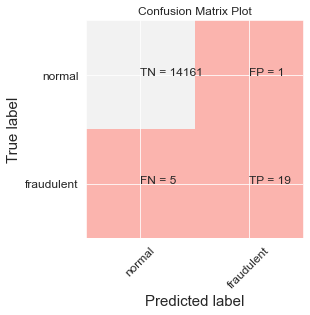


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14162
           1       0.95      0.79      0.86        24

    accuracy                           1.00     14186
   macro avg       0.97      0.90      0.93     14186
weighted avg       1.00      1.00      1.00     14186


=== Descision Tree ===
Model Accuracy:  99.8%

Confusion Matrix:
 [[14145    17]
 [    5    19]]

Cross Validation Mean Score:  99.9%



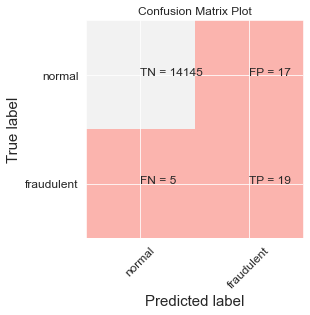


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14162
           1       0.53      0.79      0.63        24

    accuracy                           1.00     14186
   macro avg       0.76      0.90      0.82     14186
weighted avg       1.00      1.00      1.00     14186


[03:20:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:20:52] WARNING: C:/User

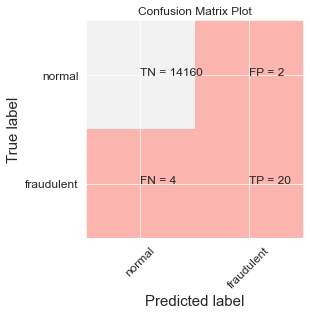


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14162
           1       0.91      0.83      0.87        24

    accuracy                           1.00     14186
   macro avg       0.95      0.92      0.93     14186
weighted avg       1.00      1.00      1.00     14186


============================= ROC Curve ===============================



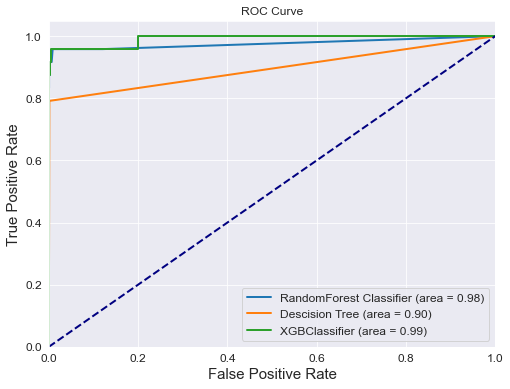

In [96]:
# Test models
classdict = {'normal':0, 'fraudulent':1}
print()
print('========================== Model valildation Results ========================' "\n")   

for i, v in models:
    scores = cross_val_score(v, X_val, y_val, cv=5)
    accuracy = metrics.accuracy_score(y_val, v.predict(X_val))
    confusion_matrix = metrics.confusion_matrix(y_val, v.predict(X_val))
    classification = metrics.classification_report(y_val, v.predict(X_val))   
    print('=== {} ==='.format(i))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))                                   
    print()
    plot_confusion_matrix(confusion_matrix, classes = list(classdict.keys()), title='Confusion Matrix Plot', cmap='Pastel1')
    print() 
    print("Classification Report:" "\n", classification) 
    print() 

print('============================= ROC Curve ===============================' "\n") 
plot_roc_auc(arg1=models, arg2=X_val, arg3=y_val)                                   

**Since the XGB Classifier gave the hiest F1 Score and recall and precision , will do Grid Searsh for XGB Classifier to find the best parmeter for it .**

# <span style="background-color: beige"> Grid Search for XGBClassifier  </span>


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [ ]:
# A parameter grid for XGBoost
param_comb = 5
folds = 3
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
#Executing Randomized Search
clf = RandomizedSearchCV(estimator=xgb, param_distributions=params, scoring='accuracy', return_train_score=True, verbose=1, cv=3)


In [ ]:
clf.fit(X_train_smote, y_train_smote)

In [ ]:
clf

In [144]:
y_pred = clf.predict(X_val)
print ("XGB Classifaire after Grid scresh: ")
print_metrics(y_val,y_pred)

XGB Classifaire after Grid scresh: 
Accuracy:    0.9996475398279995

F1 Score:    0.8936170212765957

Recall:      0.9130434782608695

Precision:   0.875



**The result of XGB Classifier after Grid Search incresed by .2 , so now we will evaluate it using test Data**

In [109]:
X_tr = np.concatenate([X_train, X_val])
y_tr = np.concatenate([y_train, y_val])
## concatonate training and validation

In [110]:
smo = SMOTE(random_state=4001)
X_tr_smote, y_tr_smote = sm.fit_resample(X_tr, y_tr)
pd.value_counts(y_tr_smote)
# resample the train data

1    269090
0    269090
dtype: int64

# <span style="background-color: beige"> Grid Search for XGBClassifier  </span>

**To find best parameter for the training data**

In [153]:
clf2 = RandomizedSearchCV(estimator=xgb, param_distributions=params, scoring='accuracy', return_train_score=True, verbose=1, cv=3)

In [154]:
clf2.fit(X_tr_smote, y_tr_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[15:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:45

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_

In [156]:
y_pred = clf2.predict(X_test)
print ("XGB Classifaire after Grid serch in test date: ")
print_metrics(y_test,y_pred)

XGB Classifaire after Grid serch in test date: 
Accuracy:    0.9996475646718828

F1 Score:    0.9019607843137256

Recall:      0.8846153846153846

Precision:   0.92



**the result of XGB Classifier after Grid Search using test data incresed by .1, so will plot confusion matrix and ROC Curve to understand the model performence better** 

In [162]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[14159     3]
 [    2    23]]


Text(0.5, 1.0, 'Confusion matrix for XGB Classifier on test set')

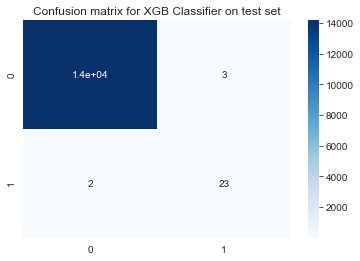

In [168]:
import seaborn as sns

sns.heatmap(cf_matrix,annot=True, cmap='Blues')
plt.title('Confusion matrix for XGB Classifier on test set')

In [174]:
from sklearn.metrics import precision_recall_curve ,roc_curve

In [175]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [176]:

# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.960


In [184]:
from sklearn import metrics
def buildROC(y_test,y_pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.gcf().savefig('roc.png')

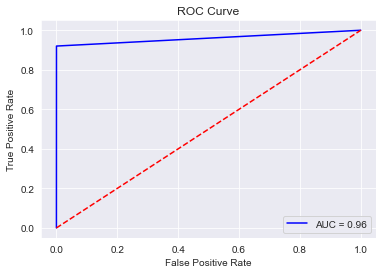

In [185]:
buildROC(y_test,y_pred)

* <span style="background-color: beige"> In Conclusion the XGB Classifier after Grid search and Cross Validation , peform very well from 25 Fraud Transaction gave us 23 as TP ,
and the ROC Curve shows us the preformence of our model , as you can see the model perform very well</span> 